# Exploratory Analysis - Ford Bike System

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [2]:
#read bike data
df = pd.read_csv('../201904-fordgobike-tripdata.csv')

In [3]:
#view data
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,NaN,NaN,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Male,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,1972.0,Male,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,1973.0,Male,No


In [4]:
#data size
df.shape

(239111, 16)

In [5]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [6]:
#data types
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

# Exploratory Data Analysis

Where are the bike stations located?

In [7]:
#view start station groups
df.groupby(['start_station_id']).count().head()

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
start_station_id,,,,,,,,,,,,,,,
3.0,3422,3422,3422,3422,3422,3422,3422,3422,3422,3422,3422,3422,3233,3233,3422
4.0,830,830,830,830,830,830,830,830,830,830,830,830,768,768,830
5.0,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3179,3179,3390
6.0,2941,2941,2941,2941,2941,2941,2941,2941,2941,2941,2941,2941,2742,2742,2941
7.0,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1007,1007,1045


In [8]:
#find lat / long extremities given a dataframe
def geoBound(df,lat_name,lon_name):
    lonmax = df[lon_name].max()
    lonmin = df[lon_name].min()
    latmax = df[lat_name].max()
    latmin = df[lat_name].min()
    return lonmax,lonmin,latmax,latmin

In [9]:
#look for anomalies
df.sort_values(by=['start_station_latitude'])[['start_station_latitude','start_station_longitude']].head()

,start_station_latitude,start_station_longitude
40680,0.000000,0.000000
185448,37.315158,-121.897833
34563,37.315158,-121.897833
37213,37.315158,-121.897833
107025,37.315158,-121.897833


In [10]:
#drop anomalous value
df = df.drop([40680])

In [11]:
bounds = geoBound (df,'start_station_latitude','start_station_longitude')
bounds

(-121.8741186, -122.4537044763565, 37.88022244590679, 37.315157929983116)

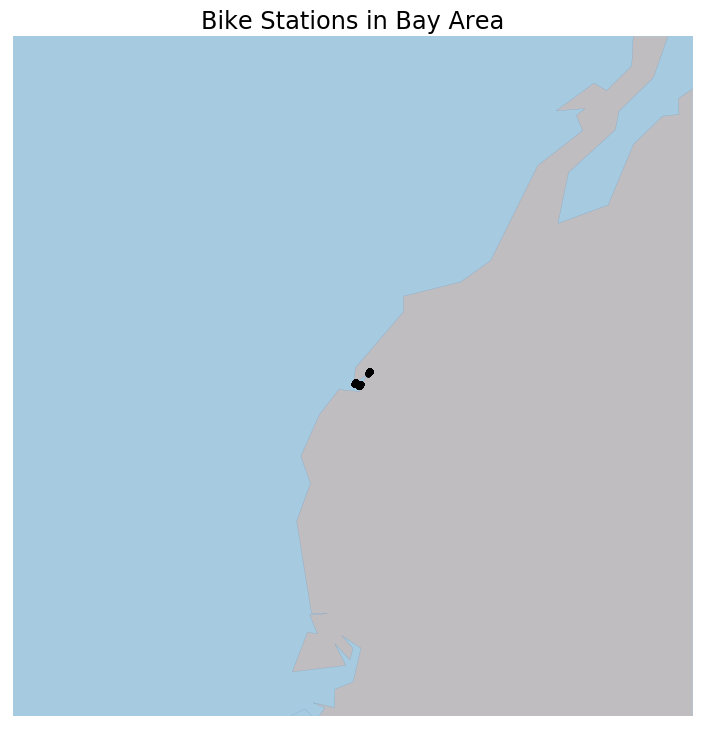

In [12]:
# map of station - view of san francisco area
my_dpi=96
plt.figure(figsize=(1300/my_dpi, 900/my_dpi), dpi=my_dpi)

# Make the background map
#m=Basemap(llcrnrlon=bounds[1], llcrnrlat=bounds[3],urcrnrlon=bounds[0],urcrnrlat=bounds[2])
m=Basemap(llcrnrlon=-135, llcrnrlat=50,urcrnrlon=-110,urcrnrlat=25)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='#ffa07a', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="steelblue")
m.drawstates(color='white')

# Add a point per position
m.scatter(df['start_station_longitude'], df['start_station_latitude'], s=10, alpha=0.5, c = 'black',zorder=2)
plt.title('Bike Stations in Bay Area',fontsize=18)
plt.show()

**Bikes stations in this data set are in northern california**

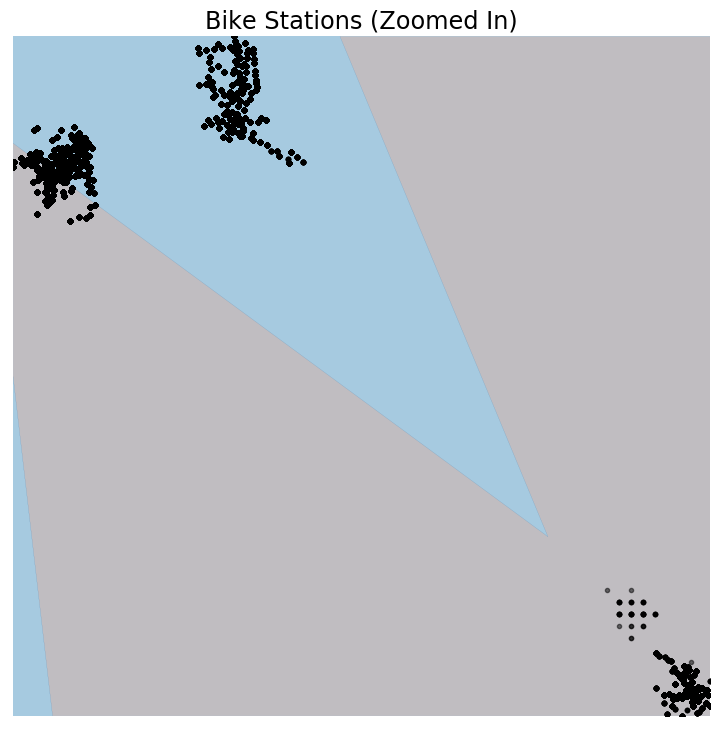

In [13]:
# zoom in view of start stations
my_dpi=96
plt.figure(figsize=(1300/my_dpi, 900/my_dpi), dpi=my_dpi)

# Make the background map
m=Basemap(llcrnrlon=bounds[1], llcrnrlat=bounds[3],urcrnrlon=bounds[0],urcrnrlat=bounds[2])
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='#ffa07a', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="steelblue")
m.drawstates(color='white')

# Add a point per position
m.scatter(df['start_station_longitude'], df['start_station_latitude'], s=10, alpha=0.5, c = 'black',zorder=2)
plt.title('Bike Stations (Zoomed In)',fontsize=18)
plt.show()

**Zoomed in view of bike stations**

How many bikes are there?

In [14]:
#find number of unique bike ids 
df['bike_id'].nunique()

4520

**There are 4520 unique bikes in this dataset**

Which types of customers are using the bikes?

In [15]:
#group data by user type to find number of customers vs subscribers
df.groupby('user_type')[['user_type']].size()

user_type
Customer       35914
Subscriber    203196
dtype: int64

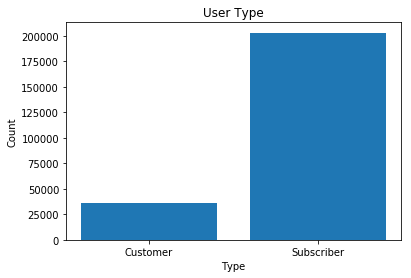

In [16]:
#barplot of user types (ie no of customers vs subscribers for all observations)
users = df.groupby('user_type')[['user_type']].size().values
index = ('Customer','Subscriber')
y_pos = np.arange(len(index))
plt.bar(y_pos, users)
plt.xticks(y_pos, index)
plt.title('User Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

**35914 trips were taken by customers, 203196 trips were taken by subscribers**

Do men or women ride the bikes more?

In [17]:
#group observations by gender
df.groupby('member_gender')[['member_gender']].size()

member_gender
Female     55498
Male      168139
Other       4274
dtype: int64

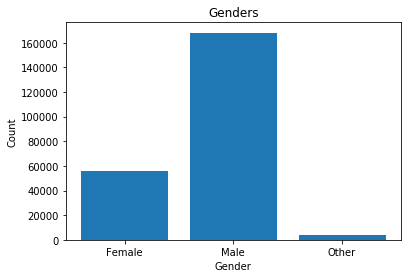

In [18]:
#barplot of observations by gender
genders = df.groupby('member_gender')[['member_gender']].size().values
index = ('Female','Male','Other')
y_pos = np.arange(len(index))
plt.bar(y_pos, genders)
plt.xticks(y_pos, index)
plt.title('Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**55498 trips were taken by females, 168139 trips were taken by males, and 4274 trips were taken by other**

In general which linear variables affect trip duration?

In [19]:
#create an intercept for a linear regresssion
df['intercept'] = 1

In [20]:
#drop missing value for linear regression
df2 = df.copy()
df2 = df2.dropna()
#linear regression with linear variables 
X = df2[['start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','bike_id','member_birth_year','intercept']]
Y = df2[['duration_sec']]
model = sm.OLS(Y,X.astype(float)).fit()

In [21]:
#low r squared, so only .5% of variation in y can be explained by the model. yikes
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           duration_sec   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     154.5
Date:                Tue, 14 May 2019   Prob (F-statistic):          1.15e-228
Time:                        00:07:46   Log-Likelihood:            -2.0334e+06
No. Observations:              227847   AIC:                         4.067e+06
Df Residuals:                  227839   BIC:                         4.067e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
start_station_latitude   -932.1639    248.038     -3.758      0.000   -1418.312    -446.016
start_station_longitude -1448.7727     88.448    -16.380      0.000   -1622.128   -1275.417
end_station_id              1.0361      0.038     27.425      0.000       0.962       1.110
end_station_latitude      273.5565    249.349      1.097      0.273    -215.162     762.275
end_station_longitude      83.2994     76.996      1.082      0.279     -67.611     234.210
bike_id                    -0.0024      0.002     -1.375      0.169      -0.006       0.001
member_birth_year          -0.6712      0.386     -1.738      0.082      -1.428       0.086
intercept               -1.402e+05   5064.583    -27.688      0.000    -1.5e+05    -1.3e+05
==============================================================================
Omnibus:                   565968.311   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       8292575938.093
Skew:                          27.175   Prob(JB):                         0.00
Kurtosis:                     936.025   Cond. No.                     6.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Really weak r squared. 0.5% of the variation in trip duration can be explained by the model**

In [22]:
df2 = df2.drop('intercept',axis=1)

In [23]:
corr = df2.corr()
corr

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
duration_sec,1.000000,0.010489,0.013379,-0.034430,0.031919,0.002797,-0.002595,0.001795,-0.004507
start_station_id,0.010489,1.000000,-0.208497,0.431878,0.326992,-0.061853,0.052152,0.016041,0.110345
start_station_latitude,0.013379,-0.208497,1.000000,-0.705841,-0.198060,0.289935,-0.077462,0.004169,-0.074800
start_station_longitude,-0.034430,0.431878,-0.705841,1.000000,0.451673,-0.203495,0.103982,-0.038727,0.117910
end_station_id,0.031919,0.326992,-0.198060,0.451673,1.000000,-0.082899,0.069073,0.022288,0.107498
end_station_latitude,0.002797,-0.061853,0.289935,-0.203495,-0.082899,1.000000,-0.973192,0.008691,-0.021755
end_station_longitude,-0.002595,0.052152,-0.077462,0.103982,0.069073,-0.973192,1.000000,-0.012199,0.012732
bike_id,0.001795,0.016041,0.004169,-0.038727,0.022288,0.008691,-0.012199,1.000000,0.033937
member_birth_year,-0.004507,0.110345,-0.074800,0.117910,0.107498,-0.021755,0.012732,0.033937,1.000000


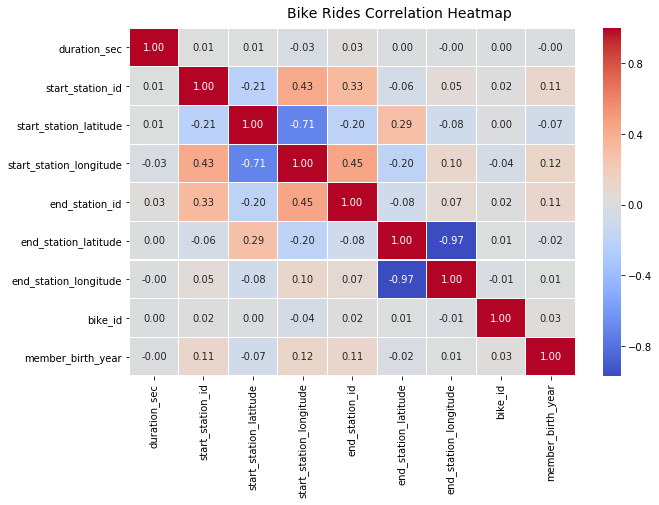

In [24]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bike Rides Correlation Heatmap', fontsize=14)

Duration is not strongly correlated with any variable 

How does user type affect trip duration?

In [25]:
#ride durations for customers, subscribers separately
customers = df[df['user_type']=='Customer'][['duration_sec']].values
subscribers = df[df['user_type']=='Subscriber'][['duration_sec']].values
data_to_plot = [customers, subscribers]

Text(0, 0.5, 'Seconds')

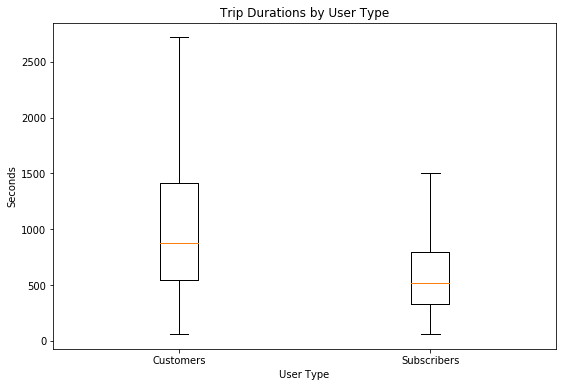

In [26]:
#create box plots to compare trip durations between customers and subscribers
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot,showfliers=False)
ax.set_xticklabels(['Customers', 'Subscribers'])
plt.title('Trip Durations by User Type')
plt.xlabel('User Type')
plt.ylabel('Seconds')

In [27]:
#trip duration quartiles for customers 
df[df['user_type']=='Customer'][['duration_sec']].describe()

,duration_sec
count,35914.000000
mean,1527.475943
std,3870.654407
min,61.000000
25%,546.000000
50%,879.000000
75%,1415.000000
max,85496.000000


In [28]:
#trip duration quartiles for subscribers
df[df['user_type']=='Subscriber'][['duration_sec']].describe()

,duration_sec
count,203196.000000
mean,674.568235
std,1379.449580
min,61.000000
25%,330.000000
50%,521.000000
75%,800.000000
max,86114.000000


**Customers have median trip duration of 879 seconds, subscribers have median duration of 521 seconds. THere is more variation in customer trip duration**

How does gender affect trip duration?

In [29]:
#trip durations for females, males, and other separately
female = df[df['member_gender']=='Female'][['duration_sec']].values
male = df[df['member_gender']=='Male'][['duration_sec']].values
other = df[df['member_gender']=='Other'][['duration_sec']].values
data_to_plot = [female, male, other]

Text(0, 0.5, 'Seconds')

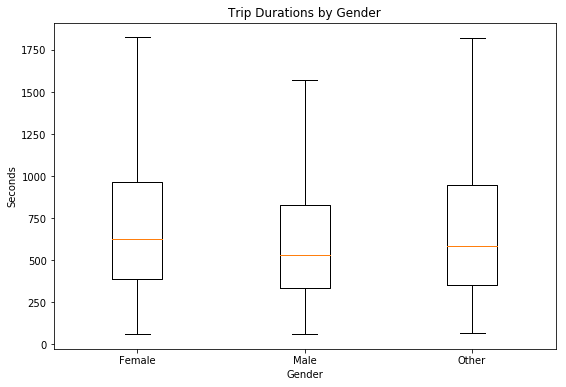

In [30]:
#create box plots to compare trip durations by gender 
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot,showfliers=False)
ax.set_xticklabels(['Female', 'Male','Other'])
plt.title('Trip Durations by Gender')
plt.xlabel('Gender')
plt.ylabel('Seconds')

In [31]:
#trip duration quartiles for females
df[df['member_gender']=='Female'][['duration_sec']].describe()

,duration_sec
count,55498.000000
mean,875.889059
std,2071.526549
min,61.000000
25%,389.000000
50%,623.000000
75%,963.000000
max,86114.000000


In [32]:
#trip duration quartile for males
df[df['member_gender']=='Male'][['duration_sec']].describe()

,duration_sec
count,168139.000000
mean,730.428901
std,1653.096590
min,61.000000
25%,334.000000
50%,532.000000
75%,830.000000
max,84782.000000


In [33]:
#trip duration quartile for other
df[df['member_gender']=='Other'][['duration_sec']].describe()

,duration_sec
count,4274.000000
mean,1054.262518
std,3683.014847
min,66.000000
25%,355.000000
50%,586.000000
75%,946.000000
max,84241.000000


**Females have median trip duration of 623 seconds, males have median duration of 532 seconds, and other have median duration of 586 seconds. The three distributions are fairly similar**

What is the relationship between age (birth year) and trip duration?

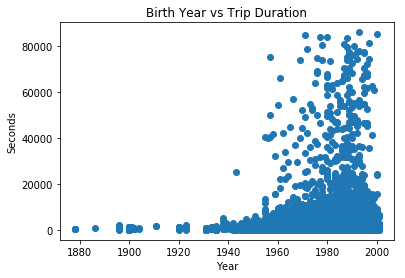

In [34]:
#scatter birth year vs trip duration
plt.scatter(df['member_birth_year'],df['duration_sec'])
plt.title('Birth Year vs Trip Duration')
plt.xlabel('Year')
plt.ylabel('Seconds');

No clear linear trend, but older people dont take long trips. More variation in younger riders.

What is the age distribution of riders?

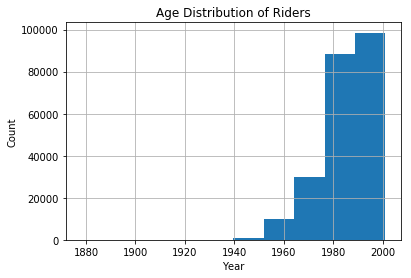

In [35]:
df['member_birth_year'].hist()
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Age Distribution of Riders');

# Summary of Main Findings

The goal of this analysis was to have a high level understanding and overview of the Ford Go Bike System. In order to have the most current view of the company, the April 2019 dataset was pulled from this site https://s3.amazonaws.com/fordgobike-data/index.html .

After scanning the data, I was interested in exploring the following two topics: 

1. Where are the bikes located and how many are there?
2. Who is using the bikes and how often?

During the data cleaning process, I reviewed data types, dropped anomalous values, and dropped NaN line items when necessary. I then used maps, bar charts, and box plots from the matplotlib library to visualize my data.

My analysis yeiled the following findings:
- Bike stations are in Northern California (San Jose area).
- There are 4520 unique bikes. 
- More trips are taken by subscribers than by customers. (203196 by subscribers, 35914 by customers)
- More trips are taken by men than by women and other. (55498 by females, 168139 males, and 4274 by other)
- One-time customers take longer trips than regular subscribers. (Customers median trip is 879 sec, subscribers median trip is 521 sec)
- Females trips are longer than male or other trips. Female median is 623 sec, male median is 532 sec, and other median is 586)
- No continuous variable is strongly correlated with trip duration. 
- Older people dont take long trips, there is more variation in younger generation. 
- There are more young riders than older riders.

Note that the numbered bullets are included in the explanatory analysis. The duplicated numbering indicates that multiple findings are on the same slide. 